In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import pickle 
from matplotlib import pyplot as plt

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\RSS")

In [3]:
df = pd.read_pickle(os.getcwd()+"\scored_cd_exi.pkl")

In [4]:
TIME_DECISION_DATE = "TIME_DECISION_DATE"
FINAL_SCORE = "XGB_SCORE"
RISK_SCORE = "RISK_SCORE"
COMBINED_SCORE = "COMBINED_SCORE"
TARGET = "RISK_FSTQPD30"
# PREDICTOR_LIST = ['G_RISK_FSTQPD30_SCORE', 'G_RISK_FPD10_SCORE','G_DEFAULT_FLAG_CHANGE_1']
df["MONTH"] = df[TIME_DECISION_DATE].dt.strftime("%y-%m")

In [5]:
df.head()

,Unnamed: 0,SKP_CREDIT_CASE,TIME_DECISION_DATE,CLIENT_EXI_3M,RISK_FPD30,RISK_FSTQPD30,RISK_FSTQPD60,SOURCE_ID,ADDRESS_CNT,ZIPCODE_CNT,...,PERMANENT_ADDRESS_PCT,PERMANENT_OFFICE_COMB_RAT,RESIDENT_OFFICE_COMB_RAT,PERMANENT_RESIDENCE_COMB_RAT,RISK_SCORE,MONTH,XGB_SCORE,RISK_SCORE_LOG,XGB_SCORE_LOG,COMBINED_SCORE
3,3,237513079,2019-06-01,Y,0,0,0,CIBIL,2,1,...,0.0000,NaN,1.0,1.0,0.022167,19-06,0.488343,-3.786746,-0.046635,0.042630
4,4,237513656,2019-06-01,Y,0,0,0,CIBIL,2,2,...,0.0000,NaN,1.0,1.0,0.054746,19-06,0.487893,-2.848745,-0.048437,0.094518
9,9,237723646,2019-06-04,Y,0,1,0,CIBIL,3,1,...,0.3333,0.5,0.5,0.5,0.038737,19-06,0.491173,-3.211455,-0.035312,0.082048
10,10,237736701,2019-06-01,Y,0,0,0,CIBIL,2,1,...,0.0000,1.0,0.5,1.0,0.056067,19-06,0.487975,-2.823502,-0.048110,0.096958
11,11,237737545,2019-06-01,Y,0,0,0,CIBIL,2,3,...,0.0000,1.0,1.0,1.0,0.003873,19-06,0.487893,-5.549739,-0.048437,0.008280


# GINI

### Gini Chart

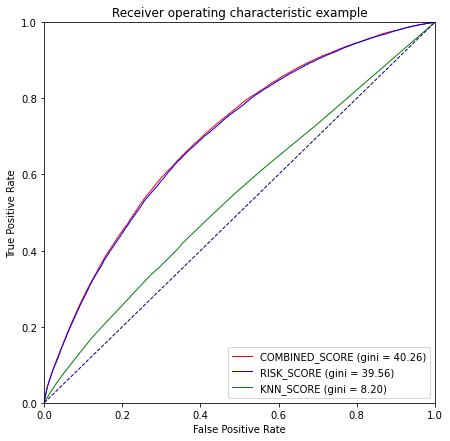

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(1, 1, 1)

lw = 1
fpr, tpr, thresholds = roc_curve(df[TARGET],df[COMBINED_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='red', lw=lw, label='COMBINED_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[RISK_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='blue', lw=lw, label='RISK_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[FINAL_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='green', lw=lw, label='KNN_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### MOM GINI

In [7]:
gini_dic = {}
for x in df["MONTH"].unique():
    try:
        if "MONTH" not in gini_dic:
            gini_dic["MONTH"] = []
        if FINAL_SCORE not in gini_dic: 
            gini_dic[FINAL_SCORE] = []
        if RISK_SCORE not in gini_dic: 
            gini_dic[RISK_SCORE] = []
        if COMBINED_SCORE not in gini_dic: 
            gini_dic[COMBINED_SCORE] = []
        
        gini_dic[FINAL_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][FINAL_SCORE])-1)*100)
        gini_dic[RISK_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][RISK_SCORE])-1)*100)
        gini_dic[COMBINED_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][COMBINED_SCORE])-1)*100)
        gini_dic["MONTH"].append(x)
#         for y in PREDICTOR_LIST:
#             if y not in gini_dic:
#                   gini_dic[y] = []
#             gini_dic[y].append(((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][y])-1)*100))
    except: 
        print("ERROR")

gini_df = pd.DataFrame(gini_dic)
gini_df.sort_values(by = "MONTH",inplace = True)
gini_df.reset_index(inplace = True)


ERROR
ERROR


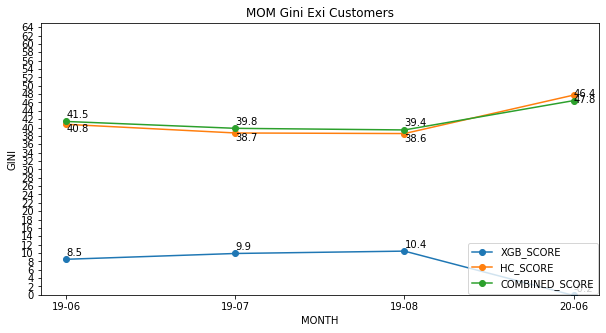

In [19]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gini_df["MONTH"],gini_df["XGB_SCORE"], marker='o', scaley = False, label = "XGB_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["RISK_SCORE"], marker='o', scaley = False, label = "HC_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE"], marker='o', scaley = False, label= "COMBINED_SCORE")

for i, txt in enumerate(gini_df["XGB_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["XGB_SCORE"][i]+0.9))
for i, txt in enumerate(gini_df["RISK_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["RISK_SCORE"][i]-1.9))
for i, txt in enumerate(gini_df["COMBINED_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE"][i]+0.9))

plt.legend(loc='lower right', borderaxespad=0.1)
plt.ylim(0,65)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,65,2))
ax1.set_title("MOM Gini Exi Customers")
plt.show()

# Lifts and Gains Chart

In [9]:
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))


In [10]:
def lift_and_gain_df(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['min_prob'] = grouped.min()[prob]
    liftstable['max_prob'] = grouped.max()[prob]
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()[target])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['%base'] = (liftstable.total / data[target].count())
    liftstable = liftstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    liftstable['cum%_base'] = (liftstable.total / data[target].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data[target].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data[target].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()

    
    liftstable['lift'] = np.round(liftstable['%bads']/liftstable['%base'] , 3)
    liftstable['cum_lift'] = np.round(liftstable['cum%_bads']/liftstable['cum%_base'] , 3)

    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)

    liftstable.index = range(1,11)
    liftstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 13)
    return(liftstable)

In [11]:
#cum%_bads is gain_score
combined_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=COMBINED_SCORE)
risk_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=RISK_SCORE)
final_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=FINAL_SCORE)

### Cumulative Lift Chart 

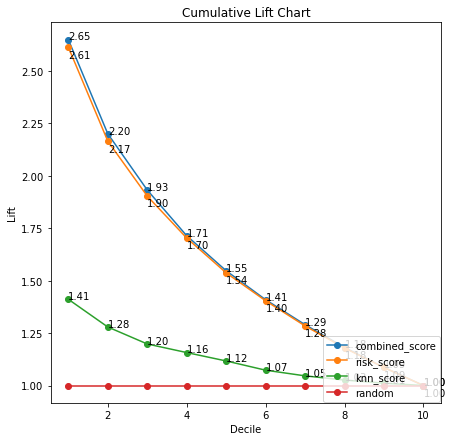

In [12]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,combined_score_lift["cum_lift"], label = 'combined_score', marker='o')
for i, txt in enumerate(combined_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (combined_score_lift.index[i], combined_score_lift["cum_lift"][i+1]))

ax1.plot(combined_score_lift.index,risk_score_lift["cum_lift"], label = 'risk_score', marker='o')
for i, txt in enumerate(risk_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], risk_score_lift["cum_lift"][i+1]-0.05))

ax1.plot(combined_score_lift.index,final_score_lift["cum_lift"], label = 'knn_score', marker='o')
for i, txt in enumerate(final_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], final_score_lift["cum_lift"][i+1]))

ax1.plot(np.arange(1,11,1),[1,1,1,1,1,1,1,1,1,1], label = 'random', marker='o')

plt.legend(loc='lower right', borderaxespad=0.1)
plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Cumulative Lift Chart")
plt.show()    


## Gains Chart

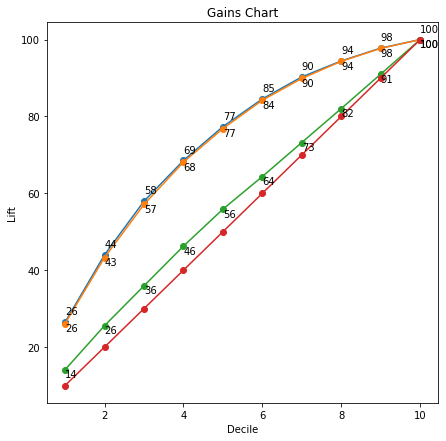

In [13]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]], label = 'combined_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (combined_score_lift.index[i], [float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]][i]+2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]], label = 'risk_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]][i]-2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in final_score_lift["cum%_bads"]], label = 'knn_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in final_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in final_score_lift["cum%_bads"]][i]-2))

ax1.plot(np.arange(1,11,1),np.arange(10,101,10), label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Gains Chart")
plt.show()    


# Kolomogorov Smirnov chart

In [14]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['bads']   = grouped.sum()[target]
    kstable['goods'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['%bads'] = (kstable.bads / data[target].sum()).apply('{0:.2%}'.format)
    kstable['%goods'] = (kstable.goods / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum%_bads']=(kstable.bads / data[target].sum()).cumsum()
    kstable['cum%_goods']=(kstable.goods / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum%_bads']-kstable['cum%_goods'], 3) * 100

    #Formating
    kstable['cum%_bads']= kstable['cum%_bads'].apply('{0:.2%}'.format)
    kstable['cum%_goods']= kstable['cum%_goods'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

KS is 29.5% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.091984,0.738952,5302,53549,26.49%,9.42%,26.49%,9.42%,17.1
2,0.068760,0.091984,3506,55344,17.51%,9.74%,44.00%,19.15%,24.8
3,0.055147,0.068760,2792,56058,13.95%,9.86%,57.95%,29.02%,28.9
4,0.045232,0.055147,2121,56729,10.60%,9.98%,68.54%,38.99%,29.5
5,0.037616,0.045232,1762,57088,8.80%,10.04%,77.35%,49.04%,28.3
6,0.031383,0.037616,1444,57406,7.21%,10.10%,84.56%,59.14%,25.4
7,0.025966,0.031383,1145,57705,5.72%,10.15%,90.28%,69.29%,21.0
8,0.021014,0.025966,836,58014,4.18%,10.21%,94.45%,79.49%,15.0
9,0.015973,0.021014,666,58184,3.33%,10.23%,97.78%,89.73%,8.1


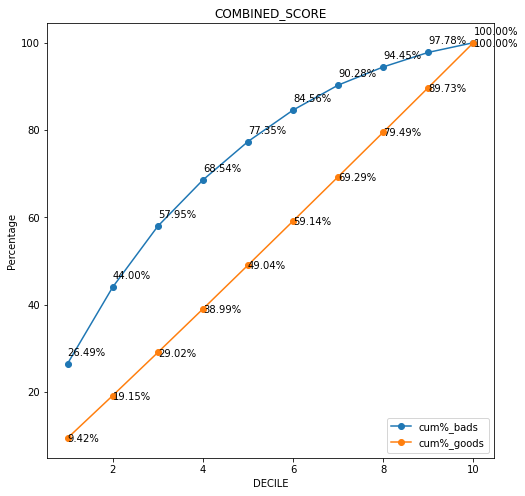

In [15]:
ks_df=ks(data=df,target=TARGET, prob=COMBINED_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("COMBINED_SCORE")
    
ks_df

KS is 29.099999999999998% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.047809,0.586963,5230,53621,26.13%,9.43%,26.13%,9.43%,16.7
2,0.034766,0.047809,3436,55414,17.16%,9.75%,43.29%,19.18%,24.1
3,0.027341,0.034766,2764,56086,13.81%,9.87%,57.10%,29.05%,28.1
4,0.022092,0.027341,2203,56647,11.01%,9.96%,68.10%,39.01%,29.1
5,0.018113,0.022092,1748,57102,8.73%,10.04%,76.84%,49.06%,27.8
6,0.014930,0.018112,1479,57371,7.39%,10.09%,84.22%,59.15%,25.1
7,0.012201,0.014930,1132,57718,5.65%,10.15%,89.88%,69.30%,20.6
8,0.009726,0.012201,893,57957,4.46%,10.20%,94.34%,79.49%,14.8
9,0.007250,0.009726,674,58176,3.37%,10.23%,97.71%,89.73%,8.0


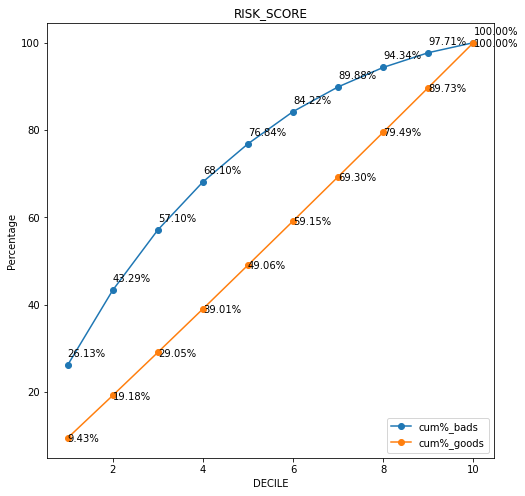

In [16]:
ks_df=ks(data=df,target=TARGET, prob=RISK_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads",marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("RISK_SCORE")
    
ks_df

KS is 6.5% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.492275,0.498574,2805,56046,14.01%,9.86%,14.01%,9.86%,4.2
2,0.490884,0.492275,2273,56577,11.35%,9.95%,25.37%,19.81%,5.6
3,0.489812,0.490884,2113,56737,10.56%,9.98%,35.92%,29.79%,6.1
4,0.489730,0.489812,2067,56783,10.33%,9.99%,46.25%,39.78%,6.5
5,0.489332,0.489730,1925,56925,9.62%,10.01%,55.86%,49.79%,6.1
6,0.487975,0.487975,1709,57141,8.54%,10.05%,64.40%,59.84%,4.6
7,0.487975,0.489332,1760,57090,8.79%,10.04%,73.19%,69.89%,3.3
8,0.487893,0.487893,1798,57053,8.98%,10.04%,82.18%,79.92%,2.3
9,0.487893,0.487893,1757,57093,8.78%,10.04%,90.95%,89.97%,1.0


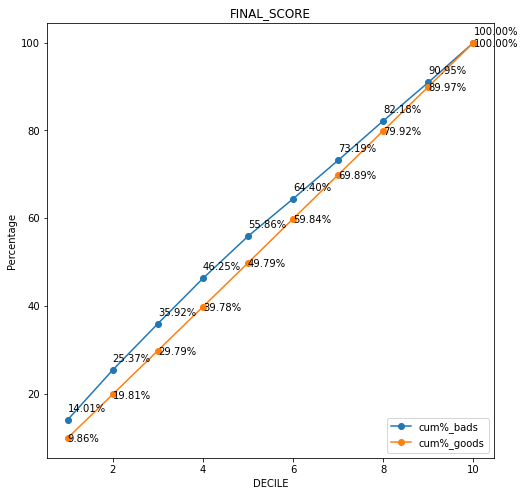

In [17]:
ks_df=ks(data=df,target=TARGET, prob=FINAL_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("FINAL_SCORE")

ks_df

# Log Loss

# Concordant – Discordant ratio

# Precision Recall Curve

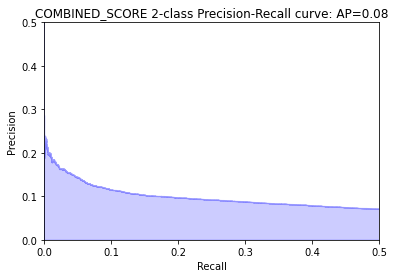

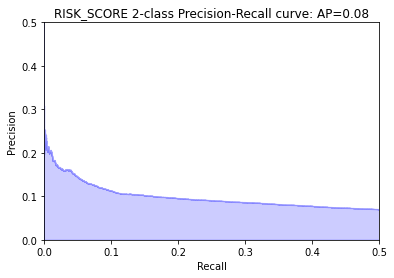

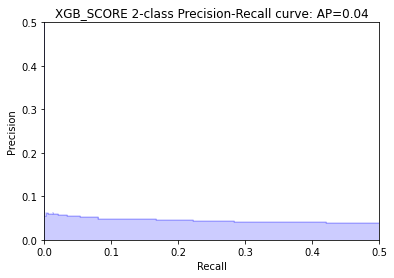

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for x in [COMBINED_SCORE,RISK_SCORE,FINAL_SCORE]:
    precision, recall, _ = precision_recall_curve(df[TARGET],df[x])

    step_kwargs = ({'step': 'post'}
                   #if 'step' in signature(plt.fill_between).parameters
                   #else {}
                  )
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.5])
    plt.xlim([0.0, 0.5])
    plt.title(x+' 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(df[TARGET],df[x])))
    plt.show()
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    #print(x +" AUC for precision-recall :",auc_pr)
    print("\n")
